In [63]:
import pandas as pd
import numpy as np
import seaborn as sns 
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
sns.set_palette("Blues_d")
import datascience
from datascience import Table
from datascience.predicates import are

from IPython.display import HTML

# import the widgets module
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [58]:
gdp = Table.read_table('data/gdp.csv')
gdp.show(5)

Country,2016
uk,37334
netherlands,45600
belgium,38766
france,37124
germany,44689


**Part 1** : We are interested in the **distribution** of the GDP for all countries in our dataset. A **histogram** allows us to visualize this distribution. First, run the cell below to generate a list of gdps from our `gdp` dataset.

In [59]:
gdp_numbers = gdp.column('2016')
gdp_numbers

array([37334, 45600, 38766, 37124, 44689, 41445, 37239, 23635,  9214,
       18635, 15416, 27738, 23279, 24838, 33419, 30110, 25346, 22574,
       17906, 11351, 13898, 11529, 16783, 10911,  6125, 12569, 36103,
       37465, 53015, 43745, 16133,  1728,  7889, 13873, 15219, 21696,
       18875, 12139, 48845])

**<span style="color:blue"> `sns.distplot(values)` allows us to create a histogram of the input values. In the cell below, use the data defined above, `gdp_numbers` and the function `sns.distplot`, to create a histogram of the distribution of gdp across all countries in our dataset. (1 pt)</span>** 

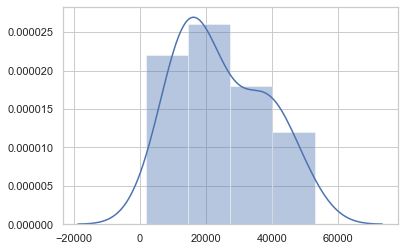

In [14]:
sns.distplot(gdp_numbers);

**<span style="color:blue"> Now, in the cell below, describe something you learn from the shape of the distribution. (1 pt)</span>** 

*Write your answer here*

**Part 2:**  NumPy is a powerful python library that allows us to perform mathematical calculations on arrays and matrices. Here, our `gdp_numbers` variable is an array, thus we can utilize NumPy methods to compute statistics on this data. Two methods that will be useful to us are `np.mean` (calculates the average of an array) and `np.median` (calculates the median of an array). 

**<span style="color:blue"> Below, use the NumPy methods mentioned above to assign `gdp_mean` to the mean and `gdp_median` to the median. (1 pt)</span>** 

In [15]:
gdp_mean = np.mean(gdp_numbers)
gdp_median = np.median(gdp_numbers)
mean_str = "{:,}".format(int(gdp_mean))
median_str = "{:,}".format(int(gdp_median))

print("The mean GDP in our data is " + mean_str)
print("The median GDP in our data is " + median_str)

The mean GDP in our data is 24,723
The median GDP in our data is 22,574


**<span style="color:blue"> In the cell below, describe which statistic is bigger and why that might be.  (1 pt)</span>** 

*Write your answer here*

In [40]:
def bootstrap(iterations, num_samples):
    sample_means = []
    for i in np.arange(iterations):
        temporary_mean = np.mean((np.random.choice(gdp_numbers, replace=False)))
        sample_means.append(temporary_mean)
    sns.distplot(sample_means);

In [41]:
def get_sample_means(iterations, num_samples):
    sample_means = []
    for i in np.arange(iterations):
        temporary_mean = np.mean((np.random.choice(gdp_numbers, replace=False)))
        sample_means.append(temporary_mean)
    return sample_means

**Part 3:** **<span style="color:blue"> Using the sliders below, modify the number of iterations and the number of samples such that the distribution fo the sample mean is roughly normally distributed. (1 pt)</span>** 

In [42]:
interact(bootstrap, iterations=10000, num_samples=IntSlider(min=5, max=30, step=1, value=10));

interactive(children=(IntSlider(value=10000, description='iterations', max=30000, min=-10000), IntSlider(value…

**<span style="color:blue"> How many number of iterations and samples did you find gave you a roughly normal curve? Why do you think this is the case? Write your answer below. (2 pt)</span>** 

*Write your answer here*

**<span style="color:blue"> In the cell below, assign the variable `num_iterations` to the number of iterations you found above. Do the same for `num_samples`(.5 pt)</span>** 

In [43]:
num_iterations = 10000
num_samples = 20

**Part 4:** What is the mean and standard deviation of the sampling distribution?  

**<span style="color:blue"> In the cell below, use `np.average` to calculate the mean and `np.std` to calculate the standard deviation.  (1 pt)</span>** 

In [44]:
sample_means = get_sample_means(num_iterations, num_samples)

mean_sample = np.average(sample_means)

mean_std = np.std(sample_means)


sample_mean_str = "{:,}".format(int(mean_sample))

std_str = "{:,}".format(int(mean_std))


print("The mean of our sample means is " + sample_mean_str)

print("The standard deviation of the sample means is " + std_str)

The mean of our sample means is 24,674
The standard deviation of the sample means is 13,234


**Part 5:** Run the cell which calculates an unknown (but familiar) statistic. 

In [51]:
unknown_statistic = int(np.std(gdp_numbers) / np.sqrt(num_samples))

statistic_str = "{:,}".format(int(unknown_statistic))

print(statistic_str)

2,966


**<span style="color:blue"> Compare your answer in *Part 4* to this statistic. What are these quantities called? Write your answer below. (1 pt)</span>** 

*Write your answer here*

**Part 6:** The code below creates two datasets from our original `gdp` dataset such that one dataset contains the GDPs of countries without an "L" in the name and another for countries with an "L" in the name. A very self-centered Professor L hypothesizes that countries with an "L" in the name much be better and richer. 

In [67]:
# Separating data between countries with an L and countries without an L 
countries_with_L = gdp.where('Country', are.containing('l'))

countries_no_L = gdp.where('Country', are.not_containing('l'))

**<span style="color:blue"> Run the cell below, which runs a t-test which analyzes Professor L's hypothesis. (1 pt)</span>** 

In [68]:
from scipy import stats

stats.ttest_ind(countries_with_L.column('2016'), countries_no_L.column('2016'), equal_var = False)

Ttest_indResult(statistic=1.4245344959707544, pvalue=0.1668310818829151)